<a href="https://colab.research.google.com/github/Sagu12/all-projects/blob/master/newsdatasetusingpycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import json

In [2]:
df= pd.read_json("/content/drive/MyDrive/enhanceduserdatabeta1.json", lines=True)

In [3]:
df.head()

,_index,_type,_id,_score,_source
0,enhanceduserdatabeta1,core2,AXGicw8zutugd-ZqVCZf,1,"{'publisher_id': '49491', 'date': '2020-04-22'..."
1,enhanceduserdatabeta1,core2,AXGidE5mCFpND4aqB9Bq,1,"{'publisher_id': '49491', 'date': '2020-04-22'..."
2,enhanceduserdatabeta1,core2,AXGidFqlutugd-ZqVDUg,1,"{'publisher_id': '49491', 'date': '2020-04-22'..."
3,enhanceduserdatabeta1,core2,AXGidneQutugd-ZqVE1I,1,"{'publisher_id': '49491', 'date': '2020-04-22'..."
4,enhanceduserdatabeta1,core2,AXGidvgrCFpND4aqB-8w,1,"{'publisher_id': '49491', 'date': '2020-04-22'..."


In [4]:
df.shape

(107600, 5)

In [5]:
source=pd.json_normalize(df._source)

In [6]:
source.head()

,publisher_id,date,country,page_title,organisation,picture_jpg,incomelevel,mastercookie_id,clickurloriginal,sourceUrl,top_url,br_user_agent,refcurrent,refcurrentoriginal,canvas_installed,clickedurl,sessionhash,screen_resoln,audience_segment,id,state,QuarterValue,page_meta_tag,brandName,reforiginal,ip,picture_gif,font_installed,cookie_id,cookiehash,browser_name,fingerprint_id,gif_animated,localStoragecuid,system_os,subcategory,dual_orientation,channel_id,parameters,device,picture_png,streaming_mov,engagementTime,gender,city,hotspot,visitor_id,agegroup,colors,request_time,referrerType,hseries,channel_name,streaming_mp4,publisher_name,ISP,session_id,time_zone,installed_activex,resolution_properties,ux_full_desktop,referrer,modelName,streaming_video,plugin,isWireless,localStorageid,screen_properties,streaming_3gpp,browserversion,latitude_longitude,postalcode,authorName,tag,publishDatev1,section
0,49491,2020-04-22,,,None,false,medium,18fdd55d_bd79_4654_a72d_10ca6652988c,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_khabare_ab_tak_story_caste...,https://m.aajtak.in/khabare-ab-tak/story/caste...,2227547380,,7.683189e+17,4031165888,,1,,Quarter4,,Google,https://m.aajtak.in/khabare-ab-tak/story/caste...,"2409:4052:887:1836:1d8f:8a33:34b5:f29d, 64.233...",false,false,a81e34f6_1d23_48ca_9254_a4f6a072822d,-1.226066e+18,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,1bd04fa3-e158-4560-9f12-52b318588b1f,Android_4.2,,true,78844,,Mobile,false,false,6.0,female,,hotspot,e9b7951d-f0fd-4c1b-88b3-4289eda2fb78,25_34,65536,2020-04-22 15:12:24,Others,ref,AJTK,true,NS,None,fb8adeda_347c_427b_bd09_28113082c8fc,420,1146773256,1080_1920,false,https___m_aajtak_in_khabare_ab_tak_story_caste...,Google_Nexus_5_2013_october,true,1257683291,true,a81e34f6-1d23-48ca-9254-a4f6a072822d,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
1,49491,2020-04-22,,,None,false,low,bf529ba0_b27a_49f9_9907_d3bd9c10ae1b,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_karyakrams_das_tak_video__...,https://m.aajtak.in/karyakrams/das-tak/video/-...,2227547380,,-3.215504e+18,4031165888,,1,,Quarter4,,Google,https://m.aajtak.in/,"2405:204:1299:b635:7e57:1081:c615:95d9, 64.233...",false,false,bca6391f_4a71_4591_9981_b2584d9c0b62,-5.499536e+16,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,29665632-ea86-41b7-a814-17d69d4ba110,Android_4.2,,true,78844,,Mobile,false,false,1.0,male,,hotspot,754cc585-b30e-4b62-9288-9fedfdc42684,45_54,65536,2020-04-22 15:13:13,Others,ref,AJTK,true,NS,None,72c7497f_1464_4669_9c47_6bf72ad0ccf8,420,1146773256,1080_1920,false,https___m_aajtak_in_,Google_Nexus_5_2013_october,true,1257683291,true,bca6391f-4a71-4591-9981-b2584d9c0b62,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
2,49491,2020-04-22,,,None,false,low,7c83502a_ac2c_4cd6_95f8_e2aa101e3315,,aajtak.intoday.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_national_video_sapna_chaud...,https://m.aajtak.in/national/video/sapna-chaud...,2227547380,,6.002996e+17,4031165888,,1,,Quarter4,,Google,https://aajtak.intoday.in/video/sapna-chaudhar...,"2401:4900:b9e:8f3d:0:61:e40e:d501, 64.233.172.53",false,false,417e7380_4970_4fd9_bd0d_240a5113d18b,3.129562e+17,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,f711131b-acc2-47de-adf2-9fa7701e0a2c,Android_4.2,,true,78844,,Mobile,false,false,6.0,male,,hotspot,fb3b8a13-48b9-4756-ab3d-a5c777ccf8ca,45_54,65536,2020-04-22 15:13:49,Others,ref,AJTK,true,NS,None,e8ebd886_1050_45d6_91f6_5462d4c6043c,420,1146773256,1080_1920,false,https___aajtak_intoday_in_video_sapna_chaudhar...,Google_Nexus_5_2013_october,true,1257683291,true,417e7380-4970-4fd9-bd0d-240a5113d18b,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
3,49491,2020-04-22,,,None,false,medium,790aa1ad_f20d_4367_b2c2_d68c3349ae84,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_movie_masala_news_on_films...,https://m.aajtak.in/movie-masala/news-on-films...,2227547380,,7.430573e+18,4031165888,

In [7]:
con= pd.concat([df, source], axis=1)

In [8]:
con= con.drop("_source", axis=1)

In [9]:
new= con[["refcurrentoriginal", "audience_segment", "engagementTime", "gender"]]

In [ ]:
new["refcurrentoriginal"]= new["refcurrentoriginal"].astype("str")

In [ ]:
new['result'] = new['refcurrentoriginal'].map(lambda x: x.lstrip('https://m. www').rstrip('aAbBcC'))

In [ ]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download("popular")

In [ ]:
ps= WordNetLemmatizer()
corpus=[]
for i in range(0,len(new)):
  print(i)
  review= re.sub("[^a-zA-Z]", " ", new["result"][i])
  review= review.lower()
  review= review.split()
  review= [ps.lemmatize(word) for word in review if not word in stopwords.words("english")]
  review= " ".join(review)
  corpus.append(review)

In [14]:
corpus

['aajtak khabare ab tak story caste based census happen year',
 'aajtak karyakrams da tak video crime woman stop',
 'aajtak national video sapna chaudhary dance show bihar begusarai ruckus crowd',
 'aajtak movie masala news film story shahid kapoor father pankaj kapoor hindi remake jersey tmov',
 'aajtak karyakrams kismat konnection video kismat connection episode november',
 'aajtak movie masala news film story pulkit samrat kriti kharbanda talk relatonship tmov',
 'aajtak movie masala news film story shah rukh khan impressed son abram made sketch bollywood superstar tmov',
 'aajtak aajtak special ayodhya case verdict story ayodhya verdict supreme court pm modi appeal maintain peace harmony dat',
 'aajtak movie masala viral video story pawan singh new bhojpuri song dugo rakhale ban song viral bhojpuri gana lb',
 'aajtak movie masala news film story vidyut jamwal move like animal recently released video tmov',
 'aajtak karyakrams halla bol video halla bol sadhvi pragya thakur defence c

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
new["news"]= corpus

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
new.head()

,refcurrentoriginal,audience_segment,engagementTime,gender,result,news
0,https://m.aajtak.in/khabare-ab-tak/story/caste...,,6.0,female,aajtak.in/khabare-ab-tak/story/caste-based-cen...,aajtak khabare ab tak story caste based census...
1,https://m.aajtak.in/karyakrams/das-tak/video/-...,,1.0,male,aajtak.in/karyakrams/das-tak/video/-when-will-...,aajtak karyakrams da tak video crime woman stop
2,https://m.aajtak.in/national/video/sapna-chaud...,,6.0,male,aajtak.in/national/video/sapna-chaudhary-dance...,aajtak national video sapna chaudhary dance sh...
3,https://m.aajtak.in/movie-masala/news-on-films...,,4.0,male,aajtak.in/movie-masala/news-on-films/story/sha...,aajtak movie masala news film story shahid kap...
4,https://m.aajtak.in/karyakrams/kismat-konnecti...,,1.0,female,aajtak.in/karyakrams/kismat-konnection/video/k...,aajtak karyakrams kismat konnection video kism...


In [18]:
new= new.drop(["result","refcurrentoriginal"], axis=1)

In [19]:
new= new[new.news != "nan"]

In [20]:
vectorizer = CountVectorizer()
vectornews = vectorizer.fit_transform(new["news"])

In [21]:
new["gender"]= pd.get_dummies(new.gender, drop_first=True)

In [22]:
new.head()

,audience_segment,engagementTime,gender,news
0,,6.0,1,aajtak khabare ab tak story caste based census...
1,,1.0,0,aajtak karyakrams da tak video crime woman stop
2,,6.0,0,aajtak national video sapna chaudhary dance sh...
3,,4.0,0,aajtak movie masala news film story shahid kap...
4,,1.0,1,aajtak karyakrams kismat konnection video kism...


In [23]:
from sklearn.decomposition import LatentDirichletAllocation

In [24]:
LDA = LatentDirichletAllocation(n_components=23, random_state=42)

In [25]:
LDA.fit(vectornews)

LatentDirichletAllocation(n_components=23, random_state=42)

In [26]:
topic_values = LDA.transform(vectornews)
topic_values.shape

(99471, 23)

In [27]:
new['segments'] = topic_values.argmax(axis=1)

In [28]:
new.head(3)

,audience_segment,engagementTime,gender,news,segments
0,,6.0,1,aajtak khabare ab tak story caste based census...,21
1,,1.0,0,aajtak karyakrams da tak video crime woman stop,21
2,,6.0,0,aajtak national video sapna chaudhary dance sh...,13


In [29]:
new_update= new.drop("audience_segment", axis=1)

In [30]:
new_update= new_update.drop("news", axis=1)

In [31]:
from sklearn.cluster import KMeans

In [32]:
k_rng= range(1,15)
sse=[]
for k in k_rng:
  km= KMeans(n_clusters=k)
  km.fit(new_update[["engagementTime", "gender","segments"]])
  sse.append(km.inertia_)

In [33]:
import matplotlib.pyplot as plt

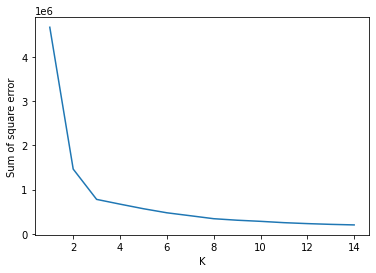

In [34]:
plt.xlabel("K")
plt.ylabel("Sum of square error")
plt.plot(k_rng,sse)

In [35]:
import seaborn as sns

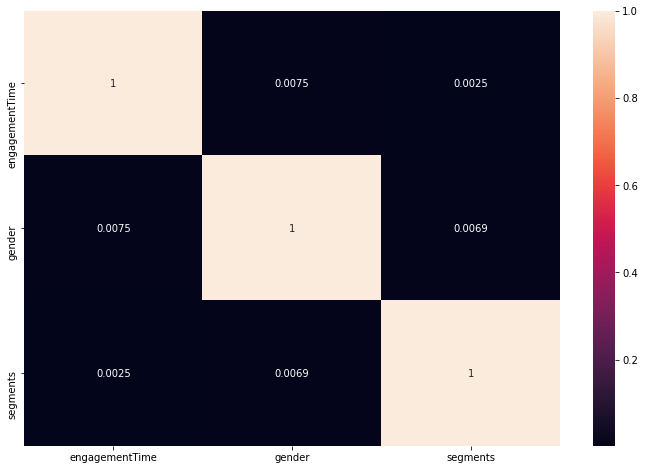

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(new_update.corr(), annot=True)
plt.show()

In [37]:
km= KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

forming target clusters based on engagement time. values above 3 are considered to be retained customers and below it indicates churned customers



In [38]:
y_predict= km.fit_predict(new_update[["engagementTime"]])
y_predict

array([0, 1, 0, ..., 1, 0, 1], dtype=int32)

In [39]:
new_update["target"]= y_predict

In [40]:
new_update.head(2)


,engagementTime,gender,segments,target
0,6.0,1,21,0
1,1.0,0,21,1


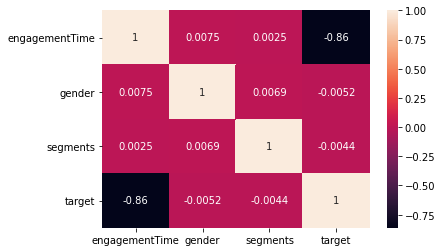

In [41]:
sns.heatmap(new_update.corr(), annot=True)

In [42]:
new_upd= new_update.drop("gender", axis=1)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X= new_upd.drop("target", axis=1)

In [45]:
y= new_upd.target

In [46]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [47]:
X_train.shape, X_test.shape

((69629, 2), (29842, 2))

In [48]:
X_train.head()

,engagementTime,segments
2656,6.0,16
96652,2.0,3
102427,2.0,19
16994,1.0,3
96074,6.0,13


In [49]:
from sklearn.model_selection import cross_val_predict


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [51]:
y_pred = cross_val_predict(SVC(), X_train, y_train, cv=3)


In [52]:
from sklearn.metrics import accuracy_score

In [ ]:
from pycaret.classification import *
clf1 = setup(data = new_upd, target = 'target')

In [64]:
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000,0.483
knn,K Neighbors Classifier,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000,0.623
nb,Naive Bayes,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000,0.051
dt,Decision Tree Classifier,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000,0.049
ridge,Ridge Classifier,1.0000,0.0,1.0,1.0000,1.0000,1.0000,1.0000,0.050
rf,Random Forest Classifier,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000,1.284
qda,Quadratic Discriminant Analysis,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000,0.052
ada,Ada Boost Classifier,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000,0.058
gbc,Gradient Boosting Classifier,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000,1.451
lda,Linear Discriminant Analysis,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000,0.069


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2040, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
sv = create_model("svm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0,1.0,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0,1.0,1.0000,1.0000,1.0000,1.0000
2,0.9967,0.0,1.0,0.9924,0.9962,0.9933,0.9933
3,1.0000,0.0,1.0,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0,1.0,1.0000,1.0000,1.0000,1.0000
5,0.9964,0.0,1.0,0.9917,0.9958,0.9927,0.9927
6,1.0000,0.0,1.0,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0,1.0,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0,1.0,1.0000,1.0000,1.0000,1.0000
9,1.0000,0.0,1.0,1.0000,1.0000,1.0000,1.0000


In [67]:
sv

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=4589, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
y_pr=sv.predict(X_test)

In [71]:
 sv.score(X_test,y_test)

0.996883586890959

In [73]:
datafr= pd.DataFrame({"predicted":y_pr, "actual":y_test})

In [74]:
datafr.head()

,predicted,actual
22566,0,0
26780,0,0
22159,1,1
50447,0,0
104612,1,1


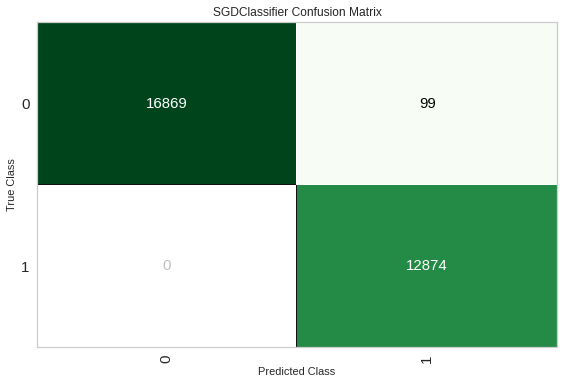

In [75]:
plot_model(sv, plot='confusion_matrix')
